<a href="https://colab.research.google.com/github/flat35hd99/report_magnetical_material/blob/master/20200508magnetical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 希土類元素Gdの磁化測定
氏名　杉浦航  
学籍番号  061800882  

希土類元素Gdの磁化率の温度依存性(M/H vs T)・磁化の磁場依存性(M-H curve)を調べる。  
この実験では$\frac{dM}{dH}$ではなく$\frac{M}{H}$を磁化率（線形磁化率）とする。  

以下の処理は今後プログラムする上で必要になる処理である。numpyは多次元配列の処理に優れているライブラリ、matplotlibは図形描画を行うpython版gnuplotのようなライブラリである。なお、このレポートはGoogle Colabを利用して作成・実行した。Google colabはjupyter notebookをベースにしたpythonの実行環境である。

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

data_300K_H, data_300K_T, data_300K_V = np.loadtxt("/content/drive/My Drive/Colab Notebooks/Data_Magnetism/Gd/M-H_Gd_300K.txt", skiprows=1, unpack=True)
data_77K_H, data_77K_T, data_77K_V = np.loadtxt("/content/drive/My Drive/Colab Notebooks/Data_Magnetism/Gd/M-H_Gd_77K.txt", skiprows=1, unpack=True )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 問題（１）
室温と液体窒素温度におけるGdの磁化の磁場依存性の測定データを使用してモル磁化M (emu/mol)
を磁場H (Oe)に対してプロットしたグラフを作成せよ。
（使用したGd試料の質量は0.3529 g、Gdの式量は157.25 g/molである。）

### 回答


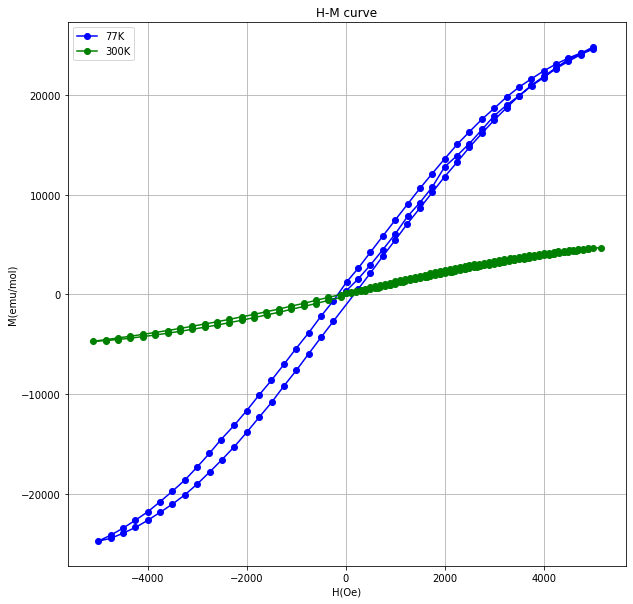

In [34]:
# 与えられた数値
sample_mass = 0.3529 # g
fomula_weight = 157.25 # g/mol
alpha_experiment = 4.228 * 10**2 # 前回実験の測定値から求めたα

# データの加工
sample_amount_of_substance = sample_mass / fomula_weight
molar_magnetication_300K = (alpha_experiment / sample_amount_of_substance) * data_300K_V
molar_magnetication_77K = (alpha_experiment / sample_amount_of_substance) * data_77K_V

# グラフの設定
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

c1, c2 = "blue", "green" #プロットの色指定
l1, l2 = "77K", "300K" # ラベルの名前指定

# 軸ラベル指定
ax.set_xlabel('H(Oe)')
ax.set_ylabel('M(emu/mol)')

ax.set_title('H-M curve')
ax.grid() # 罫線を表示

ax.plot(data_77K_H, molar_magnetication_77K, 'o-', color=c1, label=l1)
ax.plot(data_300K_H, molar_magnetication_300K, 'o-', color=c2, label=l2)

ax.legend(loc=0) # 凡例の表示
# fig.tight_layout() # レイアウトの設定

# 問題（２）
室温と液体窒素温度におけるGdの磁化の磁場依存性を比較し、磁化の磁場依存性の特徴から、液体窒素温度におけるGdの磁気状態（磁性）を推定せよ。
## 回答
（１）で作成したグラフを見ると、常温のときと比較して磁性が強く残っている。Gdの液体窒素温度での時期状態（磁性）は強磁性であると言える。

# 問題（３）
液体窒素温度におけるGdの１原子当たりの飽和磁化M0はボーア磁子μBを単位にした場合、どの程度の値になるか推定せよ。（μ<sub>B</sub>= 9.27×10<sup>−21</sup> (emu) である。）
また、推定したGdの１原子当たりの飽和磁化M<sub>0</sub>からg<sub>J</sub>J（g<sub>J</sub> : ランデのg因子、J : 全角運動量）は
どの程度の値になるか調べよ。
## 回答
飽和磁化は下記"Saturation magnetization"である。μ<sub>B</sub>を単位にしたときの値は"result"である。

In [35]:

bohr_magneton = 9.27 * 10 ** -21 # [emu] ボーア磁子

# 最大値と最小値の絶対値の平均
# 液体窒素温度での飽和磁化
saturation_magnetization = (abs(np.max(molar_magnetication_77K))+abs(np.min(molar_magnetication_77K)))/2 # [emu]
print('Saturation magnetization =',saturation_magnetization) 
print('result =',saturation_magnetization/bohr_magneton )

avogadro_constant = 6.02214 * 10 ** 23 # [1/mol] アボガドロ定数

saturation_magnetization_per_atom = saturation_magnetization / avogadro_constant
print('Saturation magnetization per atom =',saturation_magnetization_per_atom)

Saturation magnetization = 24789.276775290447
result = 2.6741398894595954e+24
Saturation magnetization per atom = 4.1163567727237245e-20


# 問題（４）
）磁場H= 5000 (Oe)を印可して測定したGdの$\frac{M}{H}$（線形磁化率）の温度依存性の測定データを使用して
モル磁化M(emu/mol)を温度T(K)に対してプロットしたグラフを作成せよ。
降温時に磁化率が急激に増大する温度（Gdの磁化率の温度依存性のグラフの変曲点）からGdの
磁気相転移温度（T<sub>C</sub> = (g<sub>J</sub> - 1）<sup>2</sup> |J<sub>eff</sub>|J(J+1)/3k<sub>B</sub> : キュリー温度）を求めよ。
## 回答


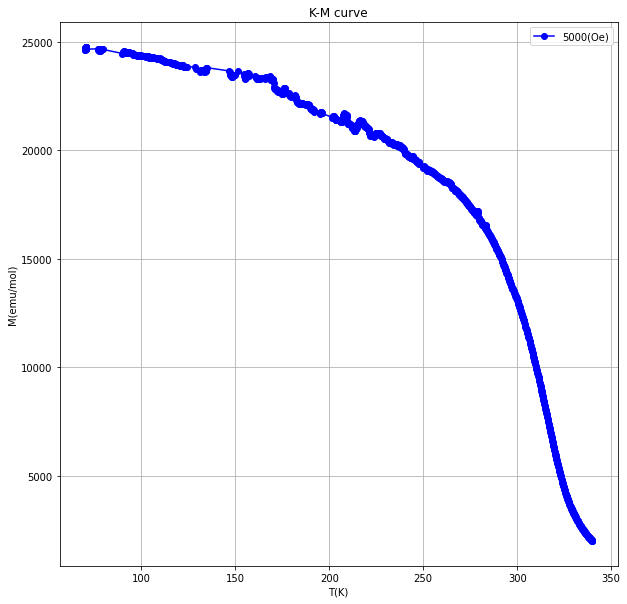

In [36]:
data_5000_Oe_H, data_5000_Oe_T, data_5000_Oe_V = np.loadtxt("/content/drive/My Drive/Colab Notebooks/Data_Magnetism/Gd/M-T_Gd.txt", skiprows=1, unpack=True)

# データの加工
molar_magnetization_5000_Oe = (alpha_experiment / sample_amount_of_substance) * data_5000_Oe_V

# グラフの設定
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)

c3 = "blue" #プロットの色指定
l3 = "5000(Oe)" # ラベルの名前指定

# 軸ラベル指定
ax2.set_xlabel('T(K)')
ax2.set_ylabel('M(emu/mol)')

ax2.set_title('K-M curve')
ax2.grid() # 罫線を表示

ax2.plot(data_5000_Oe_T, molar_magnetization_5000_Oe, 'o-', color=c3, label=l3)

ax2.legend(loc=0) # 凡例の表示

K = 250 からK = 350 の範囲を拡大表示する。

(250.0, 350.0)

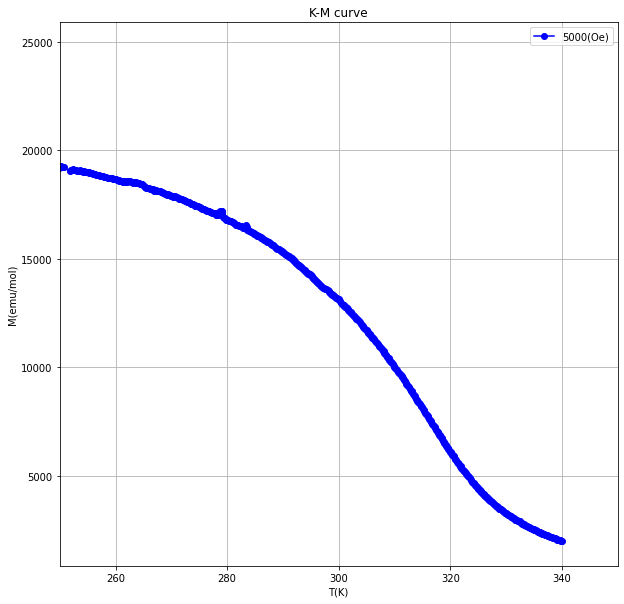

In [37]:
# グラフの設定
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)

c3 = "blue" #プロットの色指定
l3 = "5000(Oe)" # ラベルの名前指定

# 軸ラベル指定
ax2.set_xlabel('T(K)')
ax2.set_ylabel('M(emu/mol)')

ax2.set_title('K-M curve')
ax2.grid() # 罫線を表示

ax2.plot(data_5000_Oe_T, molar_magnetization_5000_Oe, 'o-', color=c3, label=l3)

ax2.legend(loc=0) # 凡例の表示
ax2.set_xlim(250,350)

目測だが、**変曲点**、磁気相転移温度は約317 Kである。  
# 問題（５）
Gdの磁化率の逆数（逆帯磁率χ<sup>-1</sup> ）の温度依存性をプロットしたグラフを作成せよ。
Gdの磁気相転移温度以上の温度領域（常磁性領域）でキュリー・ワイス則(χ<sup>-1</sup> = H/M = (T - T<sub>θ</sub>/C, C: キュリー定数）を用いてデータを解析（fitting）を行い、
有効磁子数（p<sub>eff</sub> = g<sub>J</sub>$\sqrt(J(J+1))$ ≒ $\sqrt(8C)$ )とワイス温度(T<sub>θ</sub> = (g<sub>J</sub> - 1)<sup>2</sup>J<sub>eff</sub>J(J + 1 )/3k<sub>B</sub>を求めよ
## 回答

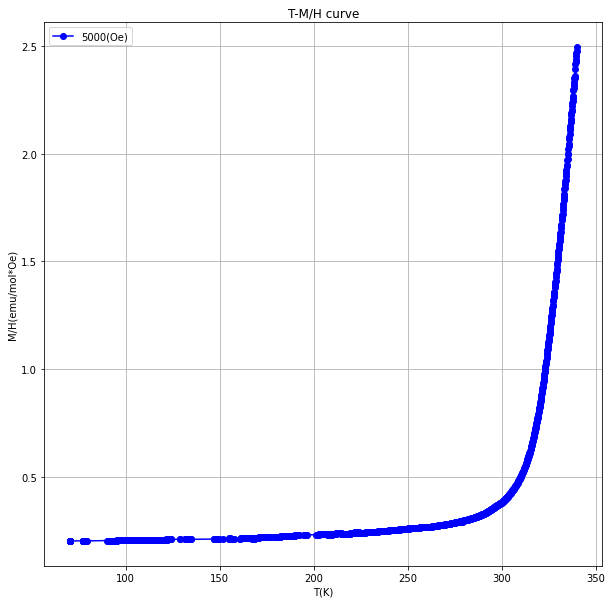

In [38]:
magnetic_susceptibility = molar_magnetization_5000_Oe / data_5000_Oe_H # 帯磁率
inverse_susceptibility = 1 / magnetic_susceptibility # 逆帯磁率

# グラフの設定
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot(111)

c4 = "blue" #プロットの色指定
l4 = "5000(Oe)" # ラベルの名前指定

# 軸ラベル指定
ax3.set_xlabel('T(K)')
ax3.set_ylabel('M/H(emu/mol*Oe)')

ax3.set_title('T-M/H curve')
ax3.grid() # 罫線を表示

ax3.plot(data_5000_Oe_T, inverse_susceptibility, 'o-', color=c4, label=l4)

ax3.legend(loc=2) # 凡例の表示

fittingについては間に合わなかったので、再提出する。  
以下は再提出内容である。  

次にキュリー・ワイス則へfittingを行い、キュリー定数Cを計算する。先ほど、磁気相転移温度を317 Kとしたので、この温度以上の範囲のデータのみを取り出す。  
なお、再利用性を高めるため、fitting関数を定義した。

In [39]:
"""
fittingにはscipyライブラリのcurve_fitモジュールを利用した。最小二乗法で解析する。
seabornはfittingの結果を目で確認するために導入したグラフ描画ライブラリである。
"""
!pip install scipy
!pip install seaborn
from scipy.optimize import curve_fit
import seaborn as sns

キュリー定数C = 12.521214872686068
ワイス温度T_θ = 310.22689176338656


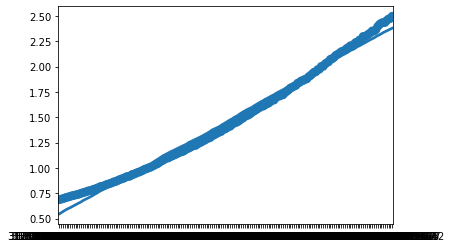

In [40]:

"""
t: 温度
c: キュリー定数
"""
def curie_weiss_low(t,curie_c,weiss_t):
    return (t-weiss_t)/curie_c

def fitting(data_T, data_molar_magnetization, data_H, curie_temperature):
    index = np.where(data_T > curie_temperature)
    target_T = data_T[index]
    target_M = data_molar_magnetization[index]
    target_H = data_H[index]

    inverse_susceptibility = target_H / target_M # キュリー温度以上の逆帯磁率
    # param[0] = キュリー定数C
    # param[1] = ワイス温度T_θ
    param, cov = curve_fit(curie_weiss_low, target_T, inverse_susceptibility)

    fit_chi = []
    for t in target_T:
        fit_chi.append( (t-param[1])/param[0] )

    # fitting の結果をグラフに示している。
    # データはプロットし、フィッティングした結果はなめらかな曲線で表している。
    sns.pointplot(x=target_T, y=inverse_susceptibility, join=False)
    sns.pointplot(x=target_T, y=np.array(fit_chi), markers="")

    print('キュリー定数C =', param[0])
    print('ワイス温度T_θ =', param[1])

fitting(data_5000_Oe_T,molar_magnetization_5000_Oe, data_5000_Oe_H, 317)



# 参考文献
キュリー・ワイスの法則 wikipedea  
https://ja.wikipedia.org/wiki/%E3%82%AD%E3%83%A5%E3%83%AA%E3%83%BC%E3%83%BB%E3%83%AF%E3%82%A4%E3%82%B9%E3%81%AE%E6%B3%95%E5%89%87
